In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

rt_str = "/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/eval_processed"

In [ ]:
ds_f3 = xr.open_dataset('/Net/Groups/BSI/data/OCN/evaluation/point/FLUXNET/v2/DE-Hai.2000-2006.obs.nc')
df_f3 = ds_f3.squeeze().to_dataframe()
df_f3.index = df_f3.index - pd.to_timedelta('30 minutes')
df_f3['year'] = df_f3.index.year
df_f3['hour'] = df_f3.index.minute/60.0 + df_f3.index.hour
df_f3['doy'] = df_f3.index.day_of_year



In [111]:
ds_f22 = xr.open_dataset('/Net/Groups/BSI/work_scratch/ppapastefanou/fluxnet2022/DE-Hai_flux.nc')
df_f22 = ds_f22.squeeze().to_dataframe()
df_f22.index = df_f22.index - pd.to_timedelta('15 minutes')
df_f22['year'] = df_f22.index.year
df_f22['hour'] = df_f22.index.minute/60.0 + df_f22.index.hour
df_f22['doy'] = df_f22.index.day_of_year
df_f22['GPP'] = df_f22['GPP']*(10**6) / 0.01201
df_f22['NEE'] = df_f22['NEE']*(10**6) / 0.01201
df_f22['LE'] = df_f22['Qle']
df_f22['Reco'] = df_f22['reco']*(10**6) / 0.01201

df_f22 = df_f22[df_f22['year'] >= 2000]
df_f22.to_csv(os.path.join(rt_str, "Fluxnet2000_2021_eval.csv"))

ds = xr.Dataset.from_dataframe(df_f22)
ds.to_netcdf(os.path.join(rt_str, "Fluxnet2000_2021_eval.nc"))


In [112]:
df_23  = pd.read_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/DE-Hai_HS_LI7200_fluxes_30min_20230101_20240101.csv", skiprows = [1])
df_23['date'] =  pd.to_datetime(df_23['TIMESTAMP_END'])
df_24  = pd.read_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/DE-Hai_HS_LI7200_fluxes_30min_20240101_20250101.csv", skiprows = [1])
df_24['date'] =  pd.to_datetime(df_24['TIMESTAMP_END'])
df_24 = df_24.drop(df_24[(df_24['date'].dt.day == 29)&(df_24['date'].dt.month == 2)].index)
df_new = pd.concat([df_23, df_24], axis =0)
df_new.set_index('date', inplace=True)
df_new.index = df_new.index - pd.to_timedelta('30 minutes')
df_new['year'] = df_new.index.year
df_new['hour'] = df_new.index.minute/ 60.0 + df_new.index.hour
df_new['doy'] = df_new.index.day_of_year
df_new = df_new.drop("TIMESTAMP_END", axis = 1)
df_new['GPP'] = -df_new['GPP_f']
df_new['NEE'] = df_new['NEE_f']
df_new['LE'] = df_new['LE_f']

df_new.to_csv(os.path.join(rt_str, "Fluxnet2023_2024_eval.csv"))

ds = xr.Dataset.from_dataframe(df_new)
ds.to_netcdf(os.path.join(rt_str, "Fluxnet2023_2024_eval.nc"))

In [85]:
df_f3

,longitude,latitude,NEE,NEE_flag,GPP,GPP_flag,Reco,Reco_flag,LE,LE_flag,...,Gc,cdrag,Ci,Ca,WUE,Tcp,LEcheck,year,hour,doy
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,10.452,51.0793,0.875941,1.0,-0.132687,1.0,0.743254,1.0,-2.100149,1.0,...,NaN,0.033450,NaN,368.77,NaN,NaN,NaN,2000,0.0,1
2000-01-01 00:30:00,10.452,51.0793,0.663175,1.0,0.076432,1.0,0.739606,1.0,-1.096890,0.0,...,NaN,0.055773,NaN,368.77,NaN,NaN,NaN,2000,0.5,1
2000-01-01 01:00:00,10.452,51.0793,0.875941,1.0,-0.131226,1.0,0.744715,1.0,-1.638050,0.0,...,NaN,0.052485,NaN,368.77,NaN,NaN,NaN,2000,1.0,1
2000-01-01 01:30:00,10.452,51.0793,0.875941,1.0,-0.126098,1.0,0.749843,1.0,-1.227500,0.0,...,NaN,0.052501,NaN,368.77,NaN,NaN,NaN,2000,1.5,1
2000-01-01 02:00:00,10.452,51.0793,0.875941,1.0,-0.124629,1.0,0.751312,1.0,-2.125300,0.0,...,NaN,0.085368,NaN,368.77,NaN,NaN,NaN,2000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-31 21:30:00,10.452,51.0793,2.381006,0.0,-0.987185,0.0,1.393821,0.0,-11.273950,0.0,...,NaN,0.052914,NaN,380.89,NaN,NaN,NaN,2006,21.5,365
2006-12-31 22:00:00,10.452,51.0793,1.117581,0.0,0.299952,0.0,1.417533,0.0,-13.629350,0.0,...,NaN,0.066550,NaN,380.89,NaN,NaN,NaN,2006,22.0,365
2006-12-31 22:30:00,10.452,51.0793,1.517891,0.0,-0.075597,0.0,1.442295,0.0,-13.594760,0.0,...,NaN,0.061096,NaN,380.89,NaN,NaN,NaN,2006,22.5,365


In [86]:
df_f22

,x,y,latitude,longitude,NEE,NEE_qc,GPP,reco,Qh,Qh_qc,...,Qg_qc,rnet,rnet_qc,GPP_qc,reco_qc,year,hour,doy,LE,Reco
time,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,1990,0.0,1,NaN,NaN
1990-01-01 00:30:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,1990,0.5,1,NaN,NaN
1990-01-01 01:00:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,1990,1.0,1,NaN,NaN
1990-01-01 01:30:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,1990,1.5,1,NaN,NaN
1990-01-01 02:00:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,1990,2.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 21:30:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,2021,21.5,365,NaN,NaN
2021-12-31 22:00:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,2021,22.0,365,NaN,NaN
2021-12-31 22:30:00,1.0,1.0,51.079167,10.453,NaN,3,NaN,NaN,NaN,3,...,3,NaN,3,3,3,2021,22.5,365,NaN,NaN


In [87]:
df_new

,Rg_f,Tair_f,VPD_f,H_orig,H_f,LE_orig,LE_f,ET_f,NEE_orig,NEE_f,...,Reco_DT,GPP_DT,CO2molefrac,H2Omolefrac,year,hour,doy,GPP,NEE,LE
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1.3725,13.9600,NaN,-81.619,-81.619219,22.086,22.0860,0.016108,1.16420,1.16420,...,1.558353,-0.001682,402.55,8.1820,2023,0.0,1,1.28600,1.16420,22.0860
2023-01-01 00:30:00,0.0000,13.9100,NaN,-81.508,-81.508200,19.083,19.0830,0.013917,0.56065,0.56065,...,1.555412,-0.000000,402.52,8.1868,2023,0.5,1,1.88430,0.56065,19.0830
2023-01-01 01:00:00,1.2715,13.8767,NaN,-96.311,-96.310620,17.058,17.0580,0.012440,0.79813,0.79813,...,1.553454,-0.001558,402.39,8.1945,2023,1.0,1,1.64330,0.79813,17.0580
2023-01-01 01:30:00,1.1823,13.7033,NaN,-89.021,-89.020660,11.536,11.5360,0.008411,1.17100,1.17100,...,1.543261,-0.001449,402.39,8.2351,2023,1.5,1,1.25210,1.17100,11.5360
2023-01-01 02:00:00,1.0768,13.5733,NaN,-100.020,-100.018830,28.005,28.0050,0.020417,1.58480,1.58480,...,1.535625,-0.001320,402.39,8.1424,2023,2.0,1,0.82453,1.58480,28.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:30:00,0.6644,-2.8473,0.2065,NaN,-70.978000,NaN,-4.2534,-0.003053,NaN,-0.45498,...,2.657016,-0.060412,NaN,NaN,2024,21.5,366,0.47393,-0.45498,-4.2534
2024-12-31 22:00:00,0.0313,-2.7840,0.1975,NaN,-70.978000,NaN,-4.2534,-0.003053,NaN,-0.45498,...,2.662104,-0.002860,NaN,NaN,2024,22.0,366,0.47402,-0.45498,-4.2534
2024-12-31 22:30:00,0.0243,-2.6787,0.1957,NaN,-73.977000,NaN,-4.3170,-0.003099,NaN,-0.47118,...,2.670556,-0.002220,NaN,NaN,2024,22.5,366,0.49036,-0.47118,-4.3170


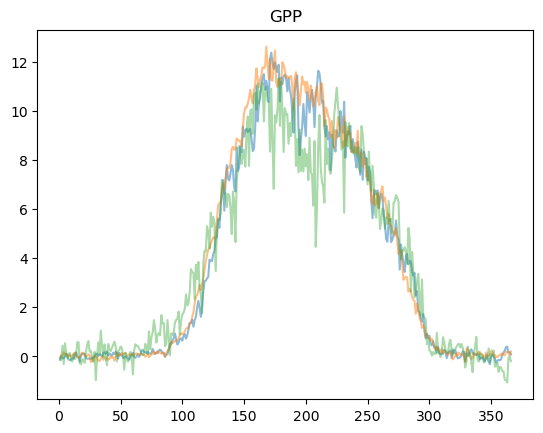

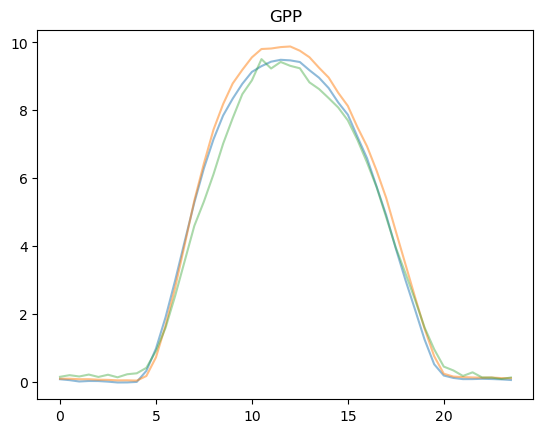

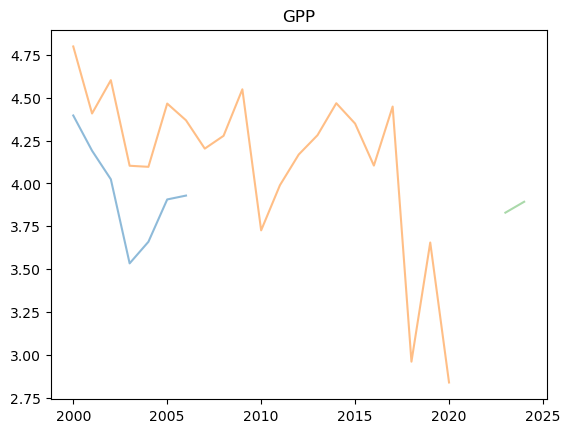

In [110]:
for subsect in ['doy', 'hour', 'year']:        

    df_f3_year_avg = df_f3.groupby(subsect).mean()
    df_22_year_avg = df_f22.groupby(subsect).mean()
    df_f2324_avg = df_new.groupby(subsect).mean()
    
    plt.figure()
    plt.plot(df_f3_year_avg['GPP'], alpha = 0.5)
    plt.plot(df_22_year_avg['GPP'], alpha = 0.5)
    plt.plot(df_f2324_avg['GPP'], alpha = 0.4)
    plt.title('GPP');
    plt.savefig(f"GPP_{subsect}.png");

In [99]:
df_22_year_avg

,x,y,latitude,longitude,NEE,NEE_qc,GPP,reco,Qh,Qh_qc,...,Qg,Qg_qc,rnet,rnet_qc,GPP_qc,reco_qc,hour,doy,LE,Reco
year,,,,,,,,,,,,,,,,,,,,,
1990,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1991,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1992,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.5,NaN,NaN
1993,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1994,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1995,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1996,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.5,NaN,NaN
1997,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN
1998,1.0,1.0,51.079167,10.453,NaN,3.000000,NaN,NaN,NaN,3.000000,...,NaN,3.000000,NaN,3.000000,3.000000,3.000000,11.75,183.0,NaN,NaN


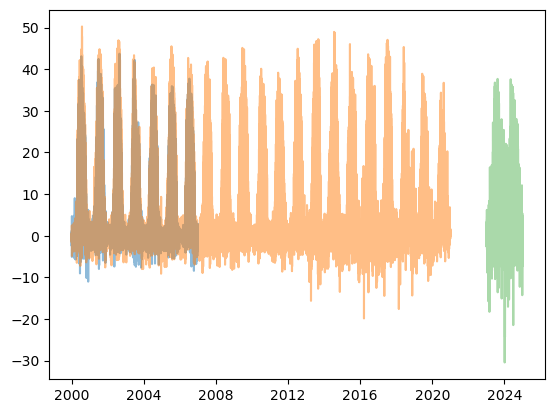

In [89]:
plt.plot(df_f3['GPP'], alpha = 0.5)
plt.plot(df_f22['GPP'], alpha = 0.5)
plt.plot(df_new['GPP'], alpha = 0.4)

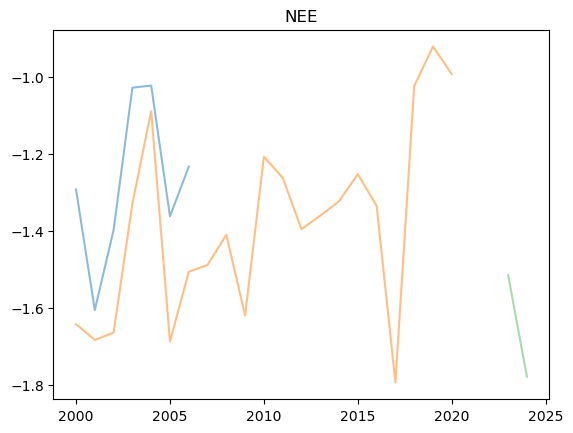

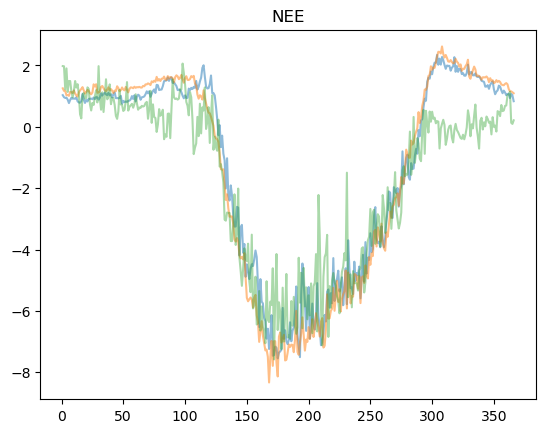

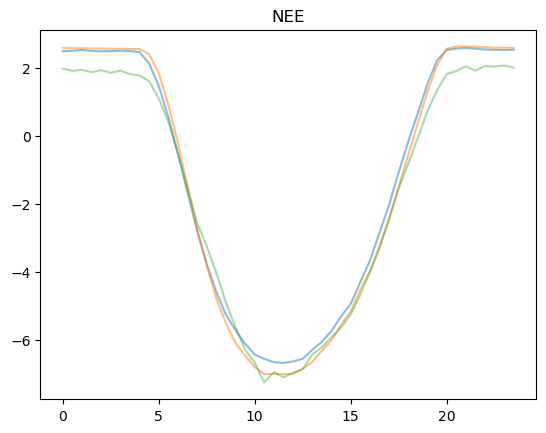

In [102]:
for subsect in ['year', 'doy', 'hour']:        

    df_f3_year_avg = df_f3.groupby(subsect).mean()
    df_22_year_avg = df_f22.groupby(subsect).mean()
    df_f2324_avg = df_new.groupby(subsect).mean()
    
    plt.figure()
    plt.plot(df_f3_year_avg['NEE'], alpha = 0.5)
    plt.plot(df_22_year_avg['NEE'], alpha = 0.5)
    plt.plot(df_f2324_avg['NEE'], alpha = 0.4)
    plt.title('NEE');
    plt.savefig(f"NEE_{subsect}.png");

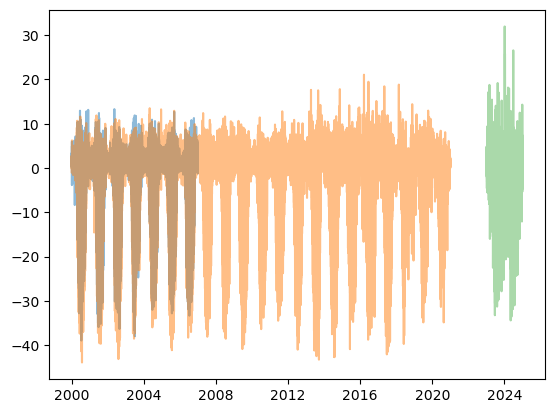

In [63]:
plt.plot(df_f3['NEE'], alpha = 0.5)
plt.plot(df_f22['NEE'] , alpha = 0.5)
plt.plot(df_new['NEE'], alpha = 0.4)

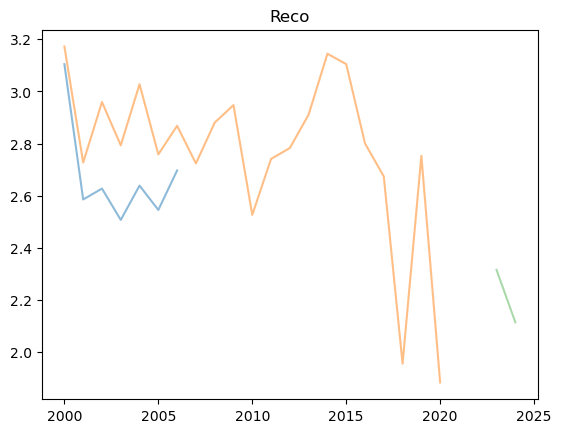

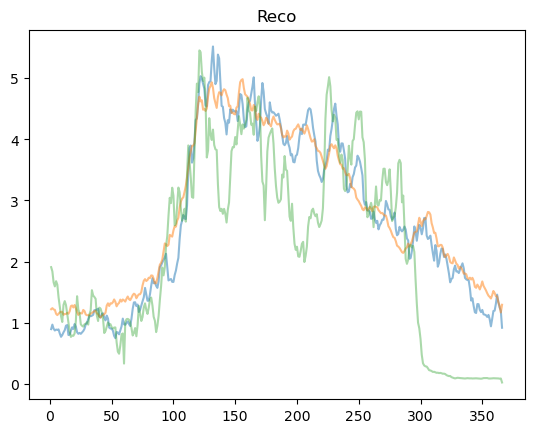

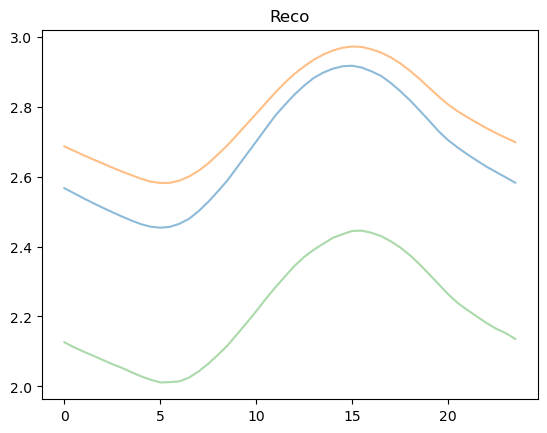

In [91]:
for subsect in ['year', 'doy', 'hour']:        

    df_f3_year_avg = df_f3.groupby(subsect).mean()
    df_22_year_avg = df_f22.groupby(subsect).mean()
    df_f2324_avg = df_new.groupby(subsect).mean()
    
    plt.figure()
    plt.plot(df_f3_year_avg['Reco'], alpha = 0.5)
    plt.plot(df_22_year_avg['Reco'], alpha = 0.5)
    plt.plot(df_f2324_avg['Reco'], alpha = 0.4)
    plt.title('Reco');
    plt.savefig(f"Reco_{subsect}.png");

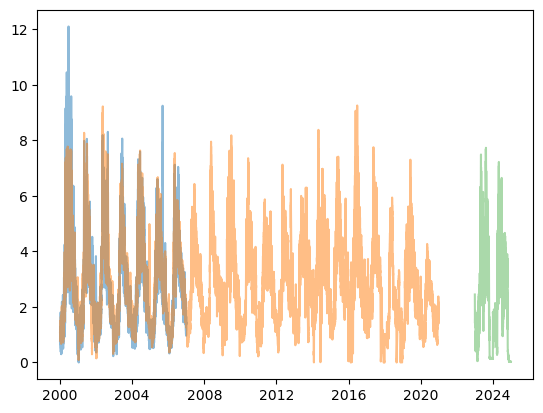

In [92]:
plt.plot(df_f3['Reco'], alpha = 0.5)
plt.plot(df_f22['Reco'], alpha = 0.5)
plt.plot(df_new['Reco'], alpha = 0.4)

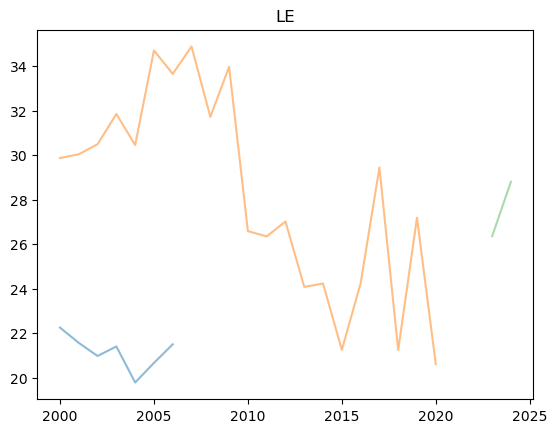

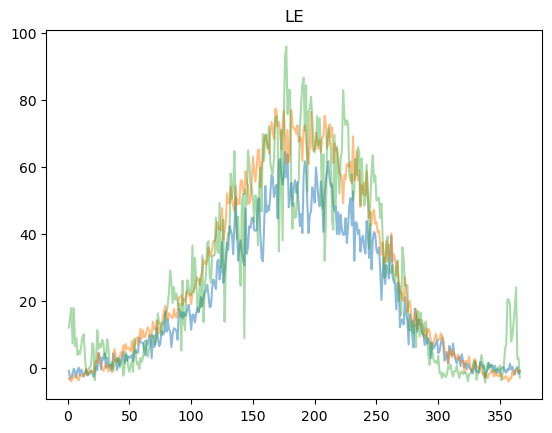

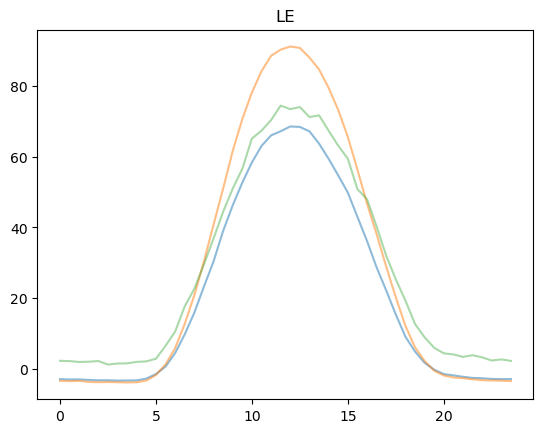

In [93]:
for subsect in ['year', 'doy', 'hour']:        

    df_f3_year_avg = df_f3.groupby(subsect).mean()
    df_22_year_avg = df_f22.groupby(subsect).mean()
    df_f2324_avg = df_new.groupby(subsect).mean()
    
    plt.figure()
    plt.plot(df_f3_year_avg['LE'], alpha = 0.5)
    plt.plot(df_22_year_avg['LE'],alpha = 0.5)
    plt.plot(df_f2324_avg['LE'], alpha = 0.4)
    plt.title('LE');
    plt.savefig(f"LE_{subsect}.png");

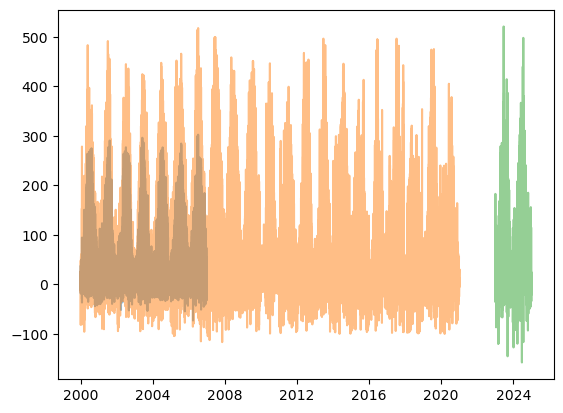

In [94]:
plt.plot(df_f3['LE'], alpha = 0.5)
plt.plot(df_f22['Qle'], alpha = 0.5)
plt.plot(df_new['LE_f'], alpha = 0.5)

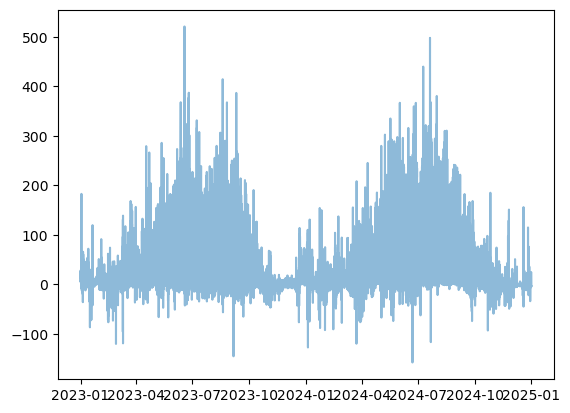

In [77]:
plt.plot(df_new['LE'], alpha = 0.5)

In [114]:
df_sap = pd.read_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/raw/SAP_Hainich_Fagus-mean_dT30min_prog.csv")

In [118]:
df_sap['date'] = pd.to_datetime(df_sap['datetime'])
df_sap.set_index('date', inplace=True)

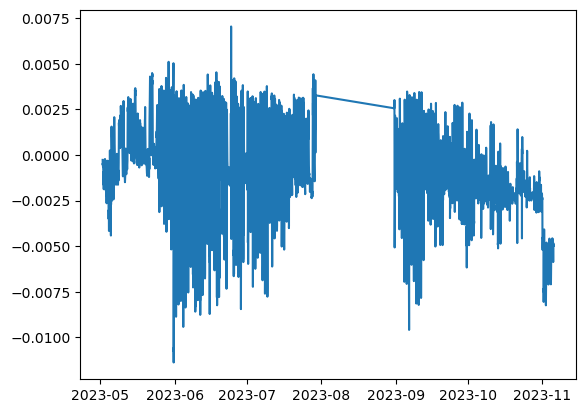

In [125]:
plt.plot(df_sap['J']-df_sap['J_sd'])

In [7]:
df_sap = pd.read_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/raw/Sapflow_Hainich_v1/SAP_Hainich_spec-trees_dT30min_prog.csv")
df_sap['date'] = pd.to_datetime(df_sap['datetime'])
df_sap.set_index('date', inplace=True)
df_sap.drop('datetime', axis = 1, inplace=True)
df_sap = df_sap[df_sap['spec'] == 'Fasy']
df_sap.drop('spec', axis = 1, inplace=True)
df_sap.index = df_sap.index.tz_localize(None)


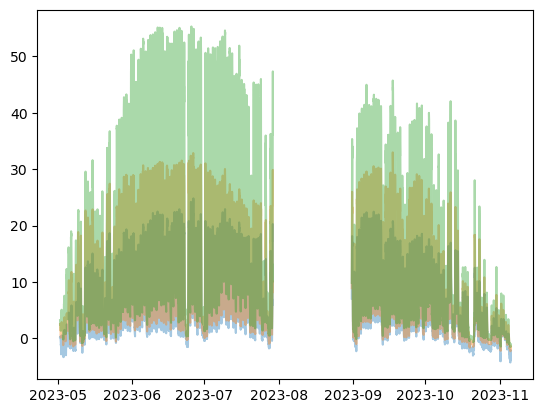

In [8]:
plt.plot(df_sap.groupby('date').quantile(0.25)['J'], alpha = 0.4)
plt.plot(df_sap.groupby('date').quantile(0.5)['J'], alpha = 0.4)
plt.plot(df_sap.groupby('date').quantile(0.75)['J'], alpha = 0.4)

In [9]:
df_sap_m = df_sap.groupby('date')['J'].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).unstack()
df_sap_m.columns = [f"J{q}" for q in [0.1, 0.25, 0.5, 0.75, 0.9]]
df_sap_m.to_csv(os.path.join(rt_str, "Sapflow2023.csv"))

ds = xr.Dataset.from_dataframe(df_sap_m)
ds.to_netcdf(os.path.join(rt_str, "Sapflow2023.nc"))

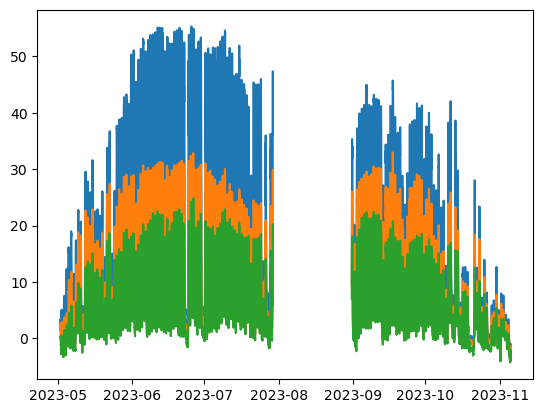

In [ ]:
plt.plot(df_sap_m[0.75])
plt.plot(df_sap_m[0.5])
plt.plot(df_sap_m[0.25])


In [4]:
df_psi = pd.read_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/raw/stem_water_pot.csv")
df_psi['date'] = pd.to_datetime(df_psi['time'])
df_psi.set_index('date', inplace=True)
df_psi.drop('time', axis = 1, inplace=True)
df_psi.index = df_psi.index.tz_localize(None)

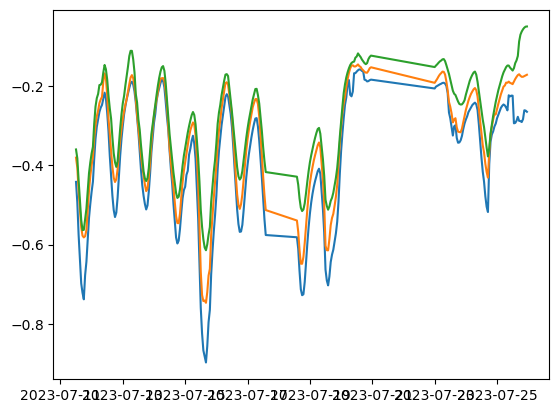

In [5]:
plt.plot(df_psi['FAG_025'])
plt.plot(df_psi['FAG'])
plt.plot(df_psi['FAG_075'])

In [6]:
df_psi.to_csv(os.path.join(rt_str, "PsiStem2023.csv"))

ds = xr.Dataset.from_dataframe(df_psi)
ds.to_netcdf(os.path.join(rt_str, "PsiStem2023.nc"))